<a href="https://colab.research.google.com/github/haeeeeuni/sm_data/blob/main/sm_data_SNOWBALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 코랩에 마운트하기

1. 구글드라이브에 sm_data_SNOWBALL 파일 전체 업로드
2. 코랩을 실행한 후, 아래의 코드를 실행
3. "Mounted at /content/drive" 출력 시 마운팅 완료

In [ ]:
# This mounts your Google Drive to the Colab VM. - 구글 드라이브 코랩에 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CSV 파일 업로드

In [ ]:
#Import packages

import pandas as pd
import numpy as np

In [ ]:
#데이터 전처리를 위해 원데이터 csv파일 읽기

# 취업데이터
file_path1 = '/content/drive/MyDrive/sm_data_SNOWBALL/취업 데이터(2016-2021).csv'
job_df = pd.read_csv(file_path1, encoding='utf-8')

# 교육과정 데이터
file_path2 = '/content/drive/MyDrive/sm_data_SNOWBALL/교육과정 데이터(2020-2023).csv'
edu_df = pd.read_csv(file_path2, encoding='utf-8')

<ipython-input-163-eb68a8d8f819>:5: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  job_df = pd.read_csv(file_path1, encoding='utf-8')


# 교육과정 데이터 전처리

**궁극적 목표인 각 과목별 전공능력을 알아내기 위해 아래의 과정으로 전처리 진행**

**교육과정 데이터 내의 전공능력명이 각 수업에서 학습할 수 있는 전공능력에 대한 정보를 저장하고 있기 떄문에 해당 부분을 활용하기 위해 전처리를 수행**

->전처리의 필요성: 여러 전공능력명을 가진 수업에 대해 여러개의 레코드로 작성되어 있어 처리에 어려움이 있기 떄문에 하나의 수업에 대해 가지고 있는 전공능력을 하나의 칼럼으로 나열할 수 있도록 전처리

1.   필요한 칼럼(학과, 과목명, 전공능력명)만으로 구성된 데이터프레임 생성
2.   같은 과목의 여러 전공능력명을 하나의 칼럼으로 결합하기 위해 학과, 과목명으로 그룹화
3. 중복되는 과목 확인 후 과목명 뒤에 _a, _b 수작업으로 추가해 구분


  
  총 2581개의 과목에 대한 각 강의의 전공능력명을 확인할 수 있는 새로운 데이터셋인 **교육과정전공능력.csv** 생성





In [ ]:
#1. 교육과정 데이터를 기반으로 필요한 칼럼(학과, 과목명, 전공능력명)만을 포함한 데이터프레임 생성
df1 = edu_df['학과']
df2 = edu_df['과목명']
df3 = edu_df['전공능력명']

edu_df_sub = pd.concat([df1, df2, df3], axis = 1)

edu_df_sub = edu_df_sub.drop_duplicates()

edu_df_sub

,학과,과목명,전공능력명
0,경영학부,경영과학2,정보를 활용한 의사 결정 능력
1,경영학부,경영과학1,정보를 활용한 의사 결정 능력
2,경영학부,시뮬레이션으로보는세상,데이터 분석 및 활용 능력
7,경영학부,브랜드마케팅,전략 및 커뮤니케이션 능력
8,경영학부,소비자행동론,마케팅 통합적 의사 결정 능력
...,...,...,...
111399,생명시스템학부,현대생물학실험Ⅱ(캡스톤디자인),실험설계 및 수행능력과 소통 능력
111400,생명시스템학부,현대생물학실험Ⅱ(캡스톤디자인),실험 결과의 분석력과 의사결정 능력
111419,생명시스템학부,미생물학,생명체 전체의 상태를 포괄적으로 해석하고 분석하는 창의력
111420,생명시스템학부,미생물학,고등생명과학지식의 자기주도적 학습 능력


In [ ]:
#위에서 얻은 세 개의 칼럼으로 구성된
#학과, 과목명으로 그룹화하고, 학과능력명을 ', '로 결합해 하나의 수업의 여러 전공능력명을 하나의 인스턴스의 값으로 합쳐주는 전처리 수행

result_df = edu_df_sub.groupby(['과목명','학과'])['전공능력명'].apply(lambda x: ' '.join(x)).reset_index()

result_df

,과목명,학과,전공능력명
0,한국화연구Ⅳ,회화과,현대 작가로서의 역량 강화 작품 조형 계획 및 기획 능력
1,15주간의우리음식문화여행,식품영양학과,산학 연계 능력 글로벌 이슈 · 트렌드 분석 능력
2,15주완성식습관바꾸기,식품영양학과,건강개선 이해 및 교육 능력 식생활지도 전문 능력
3,1인미디어·크리에이터,미디어학부,창의적 기획 및 제작 능력
4,1인미디어콘텐츠제작,홍보광고학과,기획력 제작능력
...,...,...,...
2576,획과여백의확장Ⅱ,회화과,미술 매체 및 재료 활용 능력 작품 조형 계획 및 기획 능력
2577,후생경제학,경제학부,공공부문의 역할 이해 및 협력적 소통 능력
2578,후성유전학,생명시스템학부,고등생명과학지식의 자기주도적 학습 능력 실험설계 및 수행능력과 소통 능력
2579,휴먼서비스프로그램개발,가족자원경영학과,통합적 사고 및 창의력 통합적 문제 이해 및 해결 능력 서비스 구성 기획 능력


In [ ]:
#출력 결과, 총 2570개의 과목이 존재하는 것 같아 보였지만, 각 과목명의 count를 진행한 결과 아래의 결과와 같이 다른 과에서 진행하는 같은 이름의 수업이 있다는 것을 확인
#칼럼의 unique값 별로 count를 세서 중복된 값을 찾아내 수작업으로 _a, _b 붙여 구분해 줌(총 11개 데이터 수정)
#위의 과정을 통해 전처리한 데이터는 교육과정전공능력.csv로 생성했고, 해당 파일을 첨부함(2581개의 과목에 대한 교육과정 전공능력 데이터)

count = result_df['과목명'].value_counts()

count

과목명
디지털디자인Ⅱ          2
글로벌CSR전략개발세미나    2
한국의법과제도에대한이해     2
디지털디자인Ⅰ          2
약리학Ⅰ             2
                ..
미디어글쓰기           1
미디어데이터분석         1
미디어데이터와서베이리서치    1
미디어독일어           1
희곡론              1
Name: count, Length: 2570, dtype: int64

In [ ]:
#result_df.to_csv('/content/drive/MyDrive/sm_data_SNOWBALL/교육과정전공능력_수정전.csv')

In [ ]:
# 전공능력명_학과_과목명으로 구성되어 있는 교육과정전공능력.csv 불러오기

file_path3 = '/content/drive/MyDrive/sm_data_SNOWBALL/교육과정전공능력.csv'
ability_df = pd.read_csv(file_path3, encoding='utf-8')
ability_df = ability_df.loc[:, ~ability_df.columns.str.contains('^Unnamed')]

ability_df

,과목명,학과,전공능력명
0,한국화연구Ⅳ,회화과,현대 작가로서의 역량 강화 작품 조형 계획 및 기획 능력
1,15주간의우리음식문화여행,식품영양학과,산학 연계 능력 글로벌 이슈 · 트렌드 분석 능력
2,15주완성식습관바꾸기,식품영양학과,건강개선 이해 및 교육 능력 식생활지도 전문 능력
3,1인미디어·크리에이터,미디어학부,창의적 기획 및 제작 능력
4,1인미디어콘텐츠제작,홍보광고학과,기획력 제작능력
...,...,...,...
2576,획과여백의확장Ⅱ,회화과,미술 매체 및 재료 활용 능력 작품 조형 계획 및 기획 능력
2577,후생경제학,경제학부,공공부문의 역할 이해 및 협력적 소통 능력
2578,후성유전학,생명시스템학부,고등생명과학지식의 자기주도적 학습 능력 실험설계 및 수행능력과 소통 능력
2579,휴먼서비스프로그램개발,가족자원경영학과,통합적 사고 및 창의력 통합적 문제 이해 및 해결 능력 서비스 구성 기획 능력


In [ ]:
#전처리 결과 확인 = 모든 과목명에 대해 count 값이 1임을 확인
ability_df["과목명"].value_counts()

과목명
 한국화연구Ⅳ      1
응용확률론        1
의약품합성학2      1
의약품합성학Ⅰ      1
의약품합성학Ⅱ      1
            ..
미국재산법        1
미국정치론        1
미국학세미나       1
미디어경영과마케팅    1
희곡론          1
Name: count, Length: 2581, dtype: int64

# 교육과정전공능력의 추출

**다양한 추출 방법 중 한국어 형태소분석 라이브러리인 konlpy를 이용해 전공능력명 속성의 명사만을 추출**

추출된 명사들은 과목의 전공능력을 의미한다고 가정

*   추출된 명사들은 과목의 전공능력을 의미한다고 가정
*   okt.nouns() 함수를 사용해 전공능력명 칼럼에 저장된 각 문자열들에서 명사를 추출



In [ ]:
#한국어 형태소분석 라이브러리 konlpy 설치
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

ability = ability_df['전공능력명']
ability_nouns = []

for i in range(len(ability)) :
  ability_nouns.append(okt.nouns(ability[i]))

#상단의 5개의 전공능력명_명사 출력
print(ability_nouns[0:5])

[['현대', '작가', '로서', '역량', '강화', '작품', '조형', '계획', '및', '기획', '능력'], ['산학', '계', '능력', '글로벌', '이슈', '트렌드', '분석', '능력'], ['건강', '개선', '이해', '및', '교육', '능력', '식생활', '지도', '전문', '능력'], ['창의', '기획', '및', '제작', '능력'], ['기획', '제작', '능력']]


In [ ]:
#전공능력에서 추출한 명사들을 저장한 리스트를 '전공능력명_명사' 칼럼으로 데이터프레임에 추가
#기존의 문자열 형태의 전공능력명 칼럼은 삭제

ability_df['전공능력명_명사'] = ability_nouns
ability_df = ability_df.drop('전공능력명', axis=1)

ability_df

,과목명,학과,전공능력명_명사
0,한국화연구Ⅳ,회화과,"[현대, 작가, 로서, 역량, 강화, 작품, 조형, 계획, 및, 기획, 능력]"
1,15주간의우리음식문화여행,식품영양학과,"[산학, 계, 능력, 글로벌, 이슈, 트렌드, 분석, 능력]"
2,15주완성식습관바꾸기,식품영양학과,"[건강, 개선, 이해, 및, 교육, 능력, 식생활, 지도, 전문, 능력]"
3,1인미디어·크리에이터,미디어학부,"[창의, 기획, 및, 제작, 능력]"
4,1인미디어콘텐츠제작,홍보광고학과,"[기획, 제작, 능력]"
...,...,...,...
2576,획과여백의확장Ⅱ,회화과,"[미술, 매체, 및, 재료, 활용, 능력, 작품, 조형, 계획, 및, 기획, 능력]"
2577,후생경제학,경제학부,"[부문, 역할, 이해, 및, 협력, 소통, 능력]"
2578,후성유전학,생명시스템학부,"[고등, 생명, 과학지식, 자기, 주도, 학습, 능력, 실험설계, 및, 수행, 능력..."
2579,휴먼서비스프로그램개발,가족자원경영학과,"[통합, 사고, 및, 창의력, 통합, 문제, 이해, 및, 해결, 능력, 서비스, 구..."


In [ ]:
#생성한 데이터프레임은 nouns_df이라는 이름의 데이터프레임으로 복사, csv 파일로 다운로드(주석처리)
nouns_df = ability_df.copy(deep=True)
#nouns_df.to_csv('교육과정전공능력_명사.csv')

nouns_df

,과목명,학과,전공능력명_명사
0,한국화연구Ⅳ,회화과,"[현대, 작가, 로서, 역량, 강화, 작품, 조형, 계획, 및, 기획, 능력]"
1,15주간의우리음식문화여행,식품영양학과,"[산학, 계, 능력, 글로벌, 이슈, 트렌드, 분석, 능력]"
2,15주완성식습관바꾸기,식품영양학과,"[건강, 개선, 이해, 및, 교육, 능력, 식생활, 지도, 전문, 능력]"
3,1인미디어·크리에이터,미디어학부,"[창의, 기획, 및, 제작, 능력]"
4,1인미디어콘텐츠제작,홍보광고학과,"[기획, 제작, 능력]"
...,...,...,...
2576,획과여백의확장Ⅱ,회화과,"[미술, 매체, 및, 재료, 활용, 능력, 작품, 조형, 계획, 및, 기획, 능력]"
2577,후생경제학,경제학부,"[부문, 역할, 이해, 및, 협력, 소통, 능력]"
2578,후성유전학,생명시스템학부,"[고등, 생명, 과학지식, 자기, 주도, 학습, 능력, 실험설계, 및, 수행, 능력..."
2579,휴먼서비스프로그램개발,가족자원경영학과,"[통합, 사고, 및, 창의력, 통합, 문제, 이해, 및, 해결, 능력, 서비스, 구..."


# 특정 id의 학생이 들은 수업에 대해서 정보를 추출한 class_ability 생성


#ID: 28206 - 들은대로 취업한 사람
#ID: 20744 - 독문 교직인데 프로그래머임(?)
#ID: 58969 - 경제학부인데 방송영화제작직으로 취업햇는데 학창시절에 영화관련 수업을 많이 들음


In [ ]:
#전공능력명에서 명사를 추출한 칼럼을 추가한 교육과정전공능력_명사.csv 불러오기

file_path4 = '/content/drive/MyDrive/sm_data_SNOWBALL/교육과정전공능력_명사.csv'
nouns_df = pd.read_csv(file_path4, encoding='utf-8')
nouns_df = nouns_df.loc[:, ~nouns_df.columns.str.contains('^Unnamed')]

nouns_df

,과목명,학과,전공능력명_명사
0,한국화연구Ⅳ,회화과,"['현대', '작가', '로서', '역량', '강화', '작품', '조형', '계획..."
1,15주간의우리음식문화여행,식품영양학과,"['산학', '계', '능력', '글로벌', '이슈', '트렌드', '분석', '능력']"
2,15주완성식습관바꾸기,식품영양학과,"['건강', '개선', '이해', '및', '교육', '능력', '식생활', '지도..."
3,1인미디어·크리에이터,미디어학부,"['창의', '기획', '및', '제작', '능력']"
4,1인미디어콘텐츠제작,홍보광고학과,"['기획', '제작', '능력']"
...,...,...,...
2576,획과여백의확장Ⅱ,회화과,"['미술', '매체', '및', '재료', '활용', '능력', '작품', '조형'..."
2577,후생경제학,경제학부,"['부문', '역할', '이해', '및', '협력', '소통', '능력']"
2578,후성유전학,생명시스템학부,"['고등', '생명', '과학지식', '자기', '주도', '학습', '능력', '..."
2579,휴먼서비스프로그램개발,가족자원경영학과,"['통합', '사고', '및', '창의력', '통합', '문제', '이해', '및'..."


In [ ]:
#ID: 28206 - 들은대로 취업한 사람
#ID: 20744 - 독문 교직인데 프로그래머
#ID: 58969 - 경제학부인데 방송영화제작직으로 취업햇는데 학창시절에 영화관련 수업을 많이 들음
#ID: 10456 - 통계학 전공생인데 항공기 객실 승무원 취업함
#ID: 13471 - 독일언어.문화학과인데 전문사무직-금융업에 취업함 - good

#input값으로 id를 받아 원하는 학생의 수강과목들의 목록을 취업데이터에서 해당 id를 가지는 학생의 수강 과목명을 저장하는 형식으로 저장

id = int(input())
class_data = job_df[job_df['ID'] == id]['과목명']
class_data = class_data.tolist()


#특정 id의 학생이 들은 수업에 대해서 정보를 추출한 class_ability 데이터프레임 생성
#특정 학생의 수강과목의 전공능력을 기반으로 한 워드클라우드를 생성하기 위한 기초작업

class_ability = pd.DataFrame(columns = ['과목명', '학과', '전공능력명_명사'])

for i in range(len(class_data)) :
  for j in range(len(nouns_df['과목명'])):
    if nouns_df['과목명'][j] == class_data[i]:
      new_row = nouns_df.iloc[j,:]
      class_ability.loc[i] = new_row

class_ability

28206


,과목명,학과,전공능력명_명사
6,서양미술사,회화과,"['미술', '비평', '이론', '적용', '능력', '미술관', '전시', '기..."
10,데이터구조,인공지능공학부,"['기초', '이론', '이해력', '실무', '응용', '개발', '역량', '데..."
11,객체지향프로그래밍,인공지능공학부,"['개발', '역량', '실무', '응용', '개발', '역량', '기초', '활용..."
12,교양미술(한국화),회화과,"['미술', '매체', '및', '재료', '활용', '능력']"
14,컴퓨터그래픽스,컴퓨터과학전공(첨단),"['공개', '소프트웨어', '활용', '능력', '창의', '복합', '융합', ..."
17,모바일프로그래밍,인공지능공학부,"['최신', '기술', '이해력', '기초', '활용', '및', '개발', '역량..."
20,리눅스시스템,컴퓨터과학전공(첨단),"['소프트웨어', '고급', '이론', '이해력', '공개', '소프트웨어', '활..."
22,졸업프로젝트,인공지능공학부,"['시스템', '및', '서비스', '설계', '역량', '실무', '응용', '개..."
23,컴퓨터그래픽프로그래밍,인공지능공학부,"['멀티미디어', '응용', '서비스', '설계', '능력', '기초', '활용',..."
27,프로그래밍언어론,컴퓨터과학전공(첨단),"['소프트웨어', '고급', '이론', '이해력', '시스템', '소프트웨어', '..."


# 워드 클라우드

In [ ]:
#wordcloud를 생성하기 위해 입력받은 학생의 전공 능력 형태소를 저장하는 dataframe을 생성한 후 문자열로 바꿔줌(Counter 라이브러리 사용을 위함)
word_cloud = class_ability['전공능력명_명사'].to_frame(name='전공능력명_명사')
word_cloud = word_cloud.values.tolist()

#문자열으로 변환해 저장할 문자열 a
a = ''

for i in range(len(word_cloud)):
  for j in range(len(word_cloud[i])):
    a = a + ''.join(word_cloud[i][j])
    a = a + ' '
a = a.replace('\'','')
a = a.replace('[','')
a = a.replace(']','')
a = a.replace(',','')

a

'미술 비평 이론 적용 능력 미술관 전시 기획 및 교육법 적용 능력 미술 교수 법 계발 능력 기초 이론 이해력 실무 응용 개발 역량 데이터 처리 가공 능력 개발 역량 실무 응용 개발 역량 기초 활용 및 개발 역량 최신 기술 이해력 미술 매체 및 재료 활용 능력 공개 소프트웨어 활용 능력 창의 복합 융합 능력 최신 기술 이해력 기초 활용 및 개발 역량 실무 응용 개발 역량 개발 역량 소프트웨어 고급 이론 이해력 공개 소프트웨어 활용 능력 시스템 및 서비스 설계 역량 실무 응용 개발 역량 데이터 처리 가공 능력 시스템 개발 능력 데이터 분석 능력 멀티미디어 응용 서비스 설계 능력 기초 활용 및 개발 역량 실무 응용 개발 역량 소프트웨어 고급 이론 이해력 시스템 소프트웨어 활용 능력 소프트웨어 기본 체계 이해력 시스템 소프트웨어 활용 능력 '

In [ ]:
#각 단어 수를 세주는 Counter 라이브러리 import
from collections import Counter
counter = Counter(a.split())      #상단의 과정에서 얻은 전공능력명 명사 형태소 문자열에 대해서 split 후 각 단어의 수 및 분포 비율 counter 변수에 저장

counter

Counter({'미술': 3,
         '비평': 1,
         '이론': 4,
         '적용': 2,
         '능력': 14,
         '미술관': 1,
         '전시': 1,
         '기획': 1,
         '및': 6,
         '교육법': 1,
         '교수': 1,
         '법': 1,
         '계발': 1,
         '기초': 4,
         '이해력': 6,
         '실무': 5,
         '응용': 6,
         '개발': 11,
         '역량': 11,
         '데이터': 3,
         '처리': 2,
         '가공': 2,
         '활용': 8,
         '최신': 2,
         '기술': 2,
         '매체': 1,
         '재료': 1,
         '공개': 2,
         '소프트웨어': 7,
         '창의': 1,
         '복합': 1,
         '융합': 1,
         '고급': 2,
         '시스템': 4,
         '서비스': 2,
         '설계': 2,
         '분석': 1,
         '멀티미디어': 1,
         '기본': 1,
         '체계': 1})

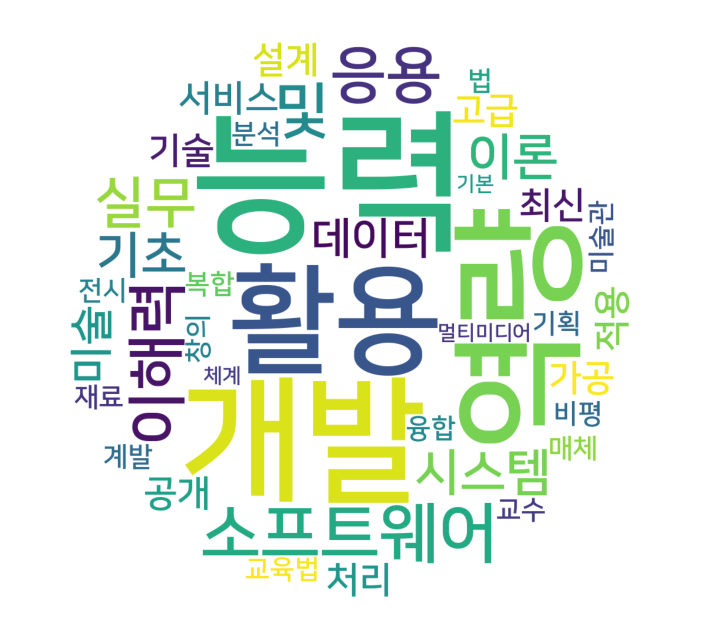

In [ ]:
#필요한 라이브러리를 설정
from wordcloud import WordCloud


#각 단어 수를 세주는 Counter 라이브러리 import
from collections import Counter
counter = Counter(a.split())      #상단의 과정에서 얻은 전공능력명 명사 형태소 문자열에 대해서 split 후 각 단어의 수 및 분포 비율 counter 변수에 저장

#원 이미지를 삽입해 원 형태의 워드클라우드로 생성
from PIL import Image
image_example = Image.open('/content/drive/MyDrive/sm_data_SNOWBALL/wordcloud/원.png')
mask = np.array(image_example)

wc = WordCloud(mask = mask ,height = mask.shape[0],
              width = mask.shape[1] ,font_path='/content/drive/MyDrive/sm_data_SNOWBALL/wordcloud/NanumSquareB.ttf',
                background_color="white", max_font_size=256)
cloud = wc.generate_from_frequencies(dict(counter))

#워드클라우드 시각화 - matplotlib 라이브러리 사용해 워드클라우드 결과물인 wc를 워드클라우드로 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

# wordcloudId() 함수의 정의

**학생의 ID를 통해 해당 학생의 수강과목 전공능력 기반 워드클라우드 출력 함수**

*   입력값: 학생의 ID
*   출력값: 해당 학생의 수강과목 전공능력 기반 워드클라우드



In [ ]:
#ID: 28206 - 들은대로 취업한 사람
#ID: 20744 - 독문 교직인데 프로그래머임(?)
#ID: 58969 - 경제학부인데 방송영화제작직으로 취업햇는데 학창시절에 영화관련 수업을 많이 들음
#input: ID

def wordcloudId(student_id) :
  id = student_id
  class_data = job_df[job_df['ID'] == id]['과목명']
  class_data = class_data.tolist()


  #특정 id의 학생이 들은 수업에 대해서 정보를 추출한 class_ability 데이터프레임 생성(word cloud 돌리기용)
  class_ability = pd.DataFrame(columns = ['과목명', '학과', '전공능력명_명사'])

  for i in range(len(class_data)) :
   for j in range(len(nouns_df['과목명'])):
      if nouns_df['과목명'][j] == class_data[i]:
        new_row = nouns_df.iloc[j,:]
        class_ability.loc[i] = new_row

  #필요한 라이브러리를 설정
  from wordcloud import WordCloud

  #wordcloud를 생성하기 위해 입력받은 학생의 전공 능력 형태소를 저장하는 dataframe을 생성한 후 문자열로 바꿔줌(Counter 라이브러리 사용을 위함)
  word_cloud = class_ability['전공능력명_명사'].to_frame(name='전공능력명_명사')

  word_cloud = word_cloud.values.tolist()

  #문자열으로 변환해 저장할 문자열 a
  a = ''

  for i in range(len(word_cloud)):
    for j in range(len(word_cloud[i])):
      a = a + ''.join(word_cloud[i][j])
      a = a + ' '
      a = a.replace('\'','')
      a = a.replace('[','')
      a = a.replace(']','')
      a = a.replace(',','')

  #각 단어 수를 세주는 Counter 라이브러리 import
  from collections import Counter
  counter = Counter(a.split())      #상단의 과정에서 얻은 전공능력명 명사 형태소 문자열에 대해서 split 후 각 단어의 수 및 분포 비율 counter 변수에 저장

  #원 형태의 워드클라우드 출력을 위해 원 이미지 넣음
  from PIL import Image
  image_example = Image.open('/content/drive/MyDrive/sm_data_SNOWBALL/wordcloud/원.png')
  mask = np.array(image_example)

  wc = WordCloud(mask = mask ,height = mask.shape[0],
                width = mask.shape[1] ,font_path='/content/drive/MyDrive/sm_data_SNOWBALL/wordcloud/NanumSquareB.ttf',
                 background_color="white", max_font_size=256)
  cloud = wc.generate_from_frequencies(dict(counter))

  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,8))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()


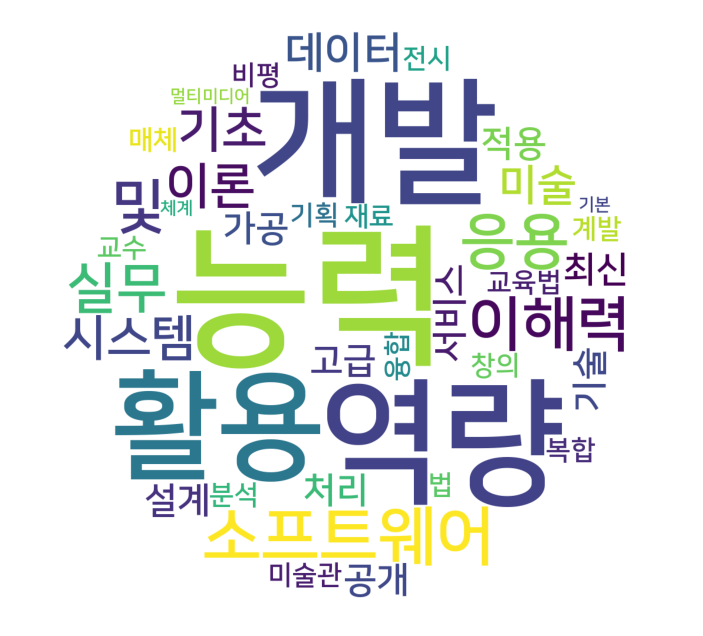

In [ ]:
#wordcloudId()의 사용 예시
#ex> input: ID = 28206

wordcloudId(28206)

#워드클라우드 출력 결과, '위의 학생은 개발, 소프트웨어, 시스템, 데이터, 응용능력, 활용능력 등을 강의에서 학습했다'는 것을 시각적으로 확인할 수 있다.